In [ ]:
import torch
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from tqdm import tqdm

# Part 1

Define a simple NN model corresponding to a logistic regression model

In [ ]:
def simple_nn(w1, w2, x1, x2):
    return 1./(1.+np.exp(-x1*w1 - x2*w2))

Generate data

In [ ]:
#np.random.seed(42)
w_true = np.array([-1, 3])
X_data = 5 * np.random.rand(100, 2) - 2.5
y_prob = simple_nn(*w_true, X_data[:, 0], X_data[:, 1])
y_data = np.random.binomial(1, y_prob)

Data shapes

In [ ]:
print(f'X_data shape {X_data.shape}')
print(f'y_data shape {y_data.shape}')

In [ ]:
display(X_data[:10])

In [ ]:
display(y_data[:10])

Use the negative log-likelihood as loss function

In [ ]:
@np.vectorize
def negloglik(w1, w2):
    return -1/y_data.shape[0] * (np.sum(np.log(simple_nn(w1, w2, X_data[y_data == 1, 0], X_data[y_data == 1, 1])))
                                 + np.sum(np.log(1.0 - simple_nn(w1, w2, X_data[y_data == 0, 0], X_data[y_data == 0, 1]))))

Do a bit of plotting of the error landscape

In [ ]:
delta = 0.1
x1 = np.arange(-10.0, 10.0, delta)
x2 = np.arange(-10.0, 10.0, delta)
# x1 = np.arange(0.5, 1.5, delta)
# x2 = np.arange(0.5, 1.5, delta)

X1, X2 = np.meshgrid(x1, x2)
Z = negloglik(X1, X2)

fig = plt.figure(figsize=(14, 6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

ax = fig.add_subplot(1, 2, 2)
ax.contourf(X1, X2, Z, cmap=cm.coolwarm, levels=100)

plt.show()

print(f'Negative log-lik for the true weights: {negloglik(*w_true)}')

## Exercise
1. Derive the gradient of the error function
2. Implement the gradient in the function below
3. Implement the gradient descent updating procedure. Experiment by changing the number of iterations, learning rate, amnd initialization point.

In [ ]:
def gradient(w, X_train=X_data, y_train = y_data):
    return -1/y_train.shape[0] * np.array([np.sum((y_train - simple_nn(*w, X_train[:, 0], X_train[:, 1])) * X_train[:, 0]),
                                             np.sum((y_train - simple_nn(*w, X_train[:, 0], X_train[:, 1])) * X_train[:, 1])])

In [ ]:
def gradient_descent(lr=0.1, epochs=100, init=np.array([0,0])):
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.contourf(X1, X2, Z, cmap=cm.coolwarm, levels=100)
    print(f'True weights: {w_true}')
    w = init
    pbar = tqdm(range(epochs))
    for _ in pbar:
        w = w - lr * gradient(w)
        ax.scatter(*w, c='g')

    plt.show()
    return w

In [ ]:
w = gradient_descent(lr=0.1, init=np.array([7.5,-2.5]))
print(f'Found weights: {w}')
print(f'NLL: {negloglik(*w)}')

# Part 2

Let's check the gradient calculations using PyTorch. For an introduction, see https://pytorch.org/tutorials/beginner/basics/intro.html. 

In [ ]:
sigmoid = torch.nn.Sigmoid()
relu = torch.nn.ReLU()

x1 = torch.tensor(1.0, requires_grad=True)
w1 = torch.tensor(2.0, requires_grad=True)

x2 = torch.tensor(3.0, requires_grad=True)
w2 = torch.tensor(0.5, requires_grad=True)

y1 = x1*w1
y1.register_hook(lambda grad: print("Grad y1 = {}".format(grad)))

y2 = x2*w2
y2.register_hook(lambda grad: print("Grad y2 = {}".format(grad)))

y3 = y1+y2
y3.register_hook(lambda grad: print("Grad y3 = {}".format(grad)))

y4 = sigmoid(y3)
y4.register_hook(lambda grad: print("Grad y4 = {}".format(grad)))

y5 = relu(y3)
y5.register_hook(lambda grad: print("Grad y5 = {}".format(grad)))

y6 = y4 * y5
y6.register_hook(lambda grad: print("Grad y6 = {}".format(grad)))

e = (1.0 - y6)**2

e.backward()

print("Grad x1 = {}".format(x1.grad))
print("Grad x2 = {}".format(x2.grad))
print("Grad w1 = {}".format(w1.grad))
print("Grad w2 = {}".format(w2.grad))

print("Done")

# Part 3

Implement the following neural network with PyTorch (as above), where the hidden units and the output unit have a sigmoid activation function:

Let the loss function be $loss = (Y − O)^2$ and assume that we have the training example $(X = 1, O = 1)$.
1. Using your implementation, find the partial derivatives for each of the weights in the network.
2. How do the derivatives compare? Can you see a general pattern and what are the implications for gradient descent?
3. Can you argue for why you see this particular pattern? Hint: Consider the local contributions to the gradient from the sigmoid functions (what is the maximum value of the local gradient?).

In [ ]:
sigmoid = torch.nn.Sigmoid()

x1 = torch.tensor(1.0, requires_grad=True)
w1 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(2.0, requires_grad=True)
w3 = torch.tensor(3.0, requires_grad=True)
w4 = torch.tensor(4.0, requires_grad=True)
w5 = torch.tensor(5.0, requires_grad=True)

y1 = x1*w1
y1.register_hook(lambda grad: print("Grad y1 = {}".format(grad)))

y2 = sigmoid(y1*w2)
y2.register_hook(lambda grad: print("Grad y2 = {}".format(grad)))

y3 = sigmoid(y2+w3)
y3.register_hook(lambda grad: print("Grad y3 = {}".format(grad)))

y4 = sigmoid(y3*w4)
y4.register_hook(lambda grad: print("Grad y4 = {}".format(grad)))

y5 = sigmoid(y4*w5)
y5.register_hook(lambda grad: print("Grad y5 = {}".format(grad)))

e = (1.0 - y5)**2

e.backward()

print("Grad x1 = {}".format(x1.grad))
print("Grad w1 = {}".format(w1.grad))
print("Grad w2 = {}".format(w2.grad))
print("Grad w3 = {}".format(w3.grad))
print("Grad w4 = {}".format(w4.grad))
print("Grad w5 = {}".format(w5.grad))

print("Done")


# Part 4

## Exercise
1. Extend your implementation from Exercise 1 with momentum
2. Experiment by changing the number of iterations, learning rate, initialization point.

## Solution

In [ ]:
def gradient_descent(lr=0.1, epochs=100, init=np.array([0,0]), momentum=0.9):
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.contourf(X1, X2, Z, cmap=cm.coolwarm, levels=100)
    print(f'True weights: {w_true}')
    w = init
    v = np.zeros_like(w)
    pbar = tqdm(range(epochs))
    for _ in pbar:
        v = momentum * v - lr * gradient(w)
        w = w + v
        pbar.set_description(f'w = {w}')
        ax.scatter(*w, c='g')
 
    plt.show()
    return w

In [ ]:
w = gradient_descent(lr=0.1, init=np.array([7.5,-2.5]))
print(f'Found weights: {w}')
print(f'NLL: {negloglik(*w)}')

# Part 5

## Exercise
1. Implement stochastic gradient descent for the model in Exercise 1.
2. Experiment by changing the number of iterations, learning rate, initialization point, mini batch size.

In [ ]:
def stochastic_gradient_descent(lr=0.1, epochs=100, init=np.array([0,0]), batch_size=20):
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.contourf(X1, X2, Z, cmap=cm.coolwarm, levels=100)
    print(f'True weights: {w_true}')
    w = init
    idx = np.arange(X_data.shape[0])
    n_batches = len(idx) // batch_size
    pbar = tqdm(range(epochs))
    for _ in pbar:
        np.random.shuffle(idx)
        for b in range(n_batches):
            batch_idx = idx[b * batch_size:(b + 1) * batch_size]
            w = w - lr * gradient(w, X_data[batch_idx], y_data[batch_idx])
            pbar.set_description(f'w = {w}')
            ax.scatter(*w, c='g')
    plt.show()
    return w

In [ ]:
w = stochastic_gradient_descent(lr=0.1, init=np.array([7.5,-2.5]))
print(f'Found weights: {w}')
print(f'NLL: {negloglik(*w)}')


# Self study 1

In this self study you should work on the code examples below together with the associated questions. The notebook illustrates a basic neural network implementation, where we implement most of the relevant functions from scratch, except for the calculation of the gradients, for which we rely on the functionality provided by <a urel="https://pytorch.org">PyTorch</a>. 

Since we rely on PyTorch functionality, we will also be using PyTorch's tensor data structure. This data structure operates in much the same way as numpy's ndarrays. You can find a brief introduction to PyTorch's tensors <a href="https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html">here</a>.  



The code illustrates the key concepts involved in the learning neural network. Go carefully through the code before starting to answer the questions at the end.

First we import the modules used in this selfstudy

In [1]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

Through torch load the MNIST data set, which we will use in this self study. The MNIST database consists of grey scale images of handwritten digits. Each image is of size $28\times 28$; see figure below for an illustration. The data set is divided into a training set consisting of $60000$ images and a test set with $10000$ images; in both
data sets the images are labeled with the correct digits. If interested, you can find more information about the MNIST data set at http://yann.lecun.com/exdb/mnist/, including accuracy results for various machine learning methods.

![MNIST DATA](MNIST-dataset.png)

Using the data loader provided by torch we have an easy way of loading in data in batches (here of size 64). We can also make various other transformation of the data, such as normalization. The details for loading the data are not really that important, but if yiu are curious, you can find a quick introduction <a href="https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html">here</a>.

In [21]:
def dataload(data_batch_size):
    dest_path = '/Users/hecter/OneDrive/7_semester/Advanced Statistical Machine Learning/Exercises/0_Data'
    train_loader = torch.utils.data.DataLoader(
            datasets.MNIST(dest_path, train=True, download=True,
                        transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))
                        ])),
            batch_size=data_batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST(dest_path, train=False, transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ])),
            batch_size=data_batch_size, shuffle=True)
    
    return train_loader, test_loader

In [22]:
train_loader, test_loader = dataload(data_batch_size=64)

In the cell above, we are loading data in batches, which is subsequently used during optimization. We didn't discuss batch based learning during the last lecture, but please take a look at Slides 24 and 25 to get the gist of the approach. We will cover it in more detail during the next lecture.   

Each batch is a list of two elements. The first element encodes the digit and has dimensions [64,1,28,28] (the figures are greyscale with no rbg channel, hence the '1'), and the second element contains the class/label information. 

Batch dimension (digit): torch.Size([64, 1, 28, 28])
Batch dimension (target): torch.Size([64])
Target: 2 with shape torch.Size([])


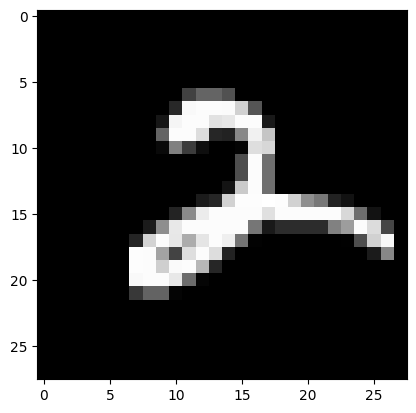

In [23]:
batch = next(iter(train_loader))
print(f"Batch dimension (digit): {batch[0].shape}")
print(f"Batch dimension (target): {batch[1].shape}")
digit_batch = batch[0]
img = digit_batch[0,:]
pyplot.imshow(img.reshape((28, 28)), cmap="gray")
print(f"Target: {batch[1][0]} with shape {batch[1][0].shape}")

With PyTorch we can specify that the tensors require gradients. This will make PyTorch record all operations performed on the tensors, so that we can afterwards calculate the gradients automatically using back propagation. See also the code example from the last lecture.

For the first part of this self study we will specify a neural network, which will encode a softmax function (see, e.g., Page 180 in <a href="https://www.deeplearningbook.org/contents/mlp.html">The Deep Learning book</a>). For this we need a (randomly initialized) weight matrix and a bias, and for both of them we need their gradients wrt. our error function (yet to be defined) in order to perform learning. Note that to facilitate matrix multiplication we will flatten our image from $28\times 28$ to $784$. 

Out model specification

In [4]:
def softmax(x):
    return x.exp() / x.exp().sum(-1).unsqueeze(-1)

def model(xb, weights, bias):
    return softmax(xb @ weights + bias)

Let's test our model (with our randomly initialized weights)

In [25]:
weights_test = torch.randn(784, 10) / np.sqrt(784)
weights_test.requires_grad_()
bias_test = torch.zeros(10, requires_grad=True)

# We flatten the digit representation so that it is consistent with the weight matrix
xb = digit_batch.flatten(start_dim=1)
print(f"Batch shape: {xb.shape}")
preds = model(xb, weights_test, bias_test)
print(f"Prediction on first image {preds[0]}")
print(f"Corresponding classification: {preds[0].argmax()}")

Batch shape: torch.Size([64, 784])
Prediction on first image tensor([0.0124, 0.0225, 0.0227, 0.1876, 0.0623, 0.1390, 0.0710, 0.0438, 0.2470,
        0.1917], grad_fn=<SelectBackward0>)
Corresponding classification: 8


Next we define our loss function, in this case the log-loss (or negative log-likelihood):

In [116]:
def nll(input, target):
    return (-input[range(target.shape[0]), target].log()).mean() 
loss_func = nll

# Make a test calculation
yb = batch[1]
print(loss_func(preds,yb))

tensor(2.8003, grad_fn=<MeanBackward0>)


In the end, we are interested in the accuracy of our model

In [7]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [8]:
print(f"Accuracy of model on batch (with random weights): {accuracy(preds, yb)}")

Accuracy of model on batch (with random weights): 0.078125


Now we are ready to combine it all and perform learning

In [125]:
def model_trainer(epochs, lr, inc_momentum, train_loader, test_loader, momentum=0.9):
    train_losses = []
    weights = torch.randn(784, 10) / np.sqrt(784)
    weights.requires_grad_()
    bias = torch.zeros(10, requires_grad=True)
    v_weights = torch.zeros_like(weights)
    v_bias = torch.zeros_like(bias)
    
    for epoch in range(epochs):

        for batch_idx, (xb, yb) in enumerate(train_loader):
            # We flatten the digit representation so that it is consistent with the weight matrix
            xb = xb.squeeze().flatten(start_dim=1)
            
            # Predictions
            pred = model(xb, weights, bias)
            
            # We specify the loss
            loss = loss_func(pred, yb)
            
            # Add l2 regularization
            #l2_norm = torch.sum(weights**2)
            #loss += l2_lambda * l2_norm
            #weights *= 1 - lr * l2_lambda
            
            # Perform backpropagation      
            loss.backward()
            
            with torch.no_grad():
                if inc_momentum:
                    # Update velocity and weights
                    v_weights = (momentum * v_weights) - (lr * weights.grad)
                    v_bias = (momentum * v_bias) - (lr * bias.grad)
                    weights += v_weights
                    bias += v_bias
                else:
                    weights -= weights.grad * lr
                    bias -= bias.grad * lr
                
                # After updating we set the gradients to zero so that we ar eready for the next round
                weights.grad.zero_()
                bias.grad.zero_()
                        
                if batch_idx % 50 == 0:
                    with torch.no_grad():
                        train_loss = np.mean([loss_func(model(txb.squeeze().flatten(start_dim=1), weights, bias), tyb).item() for txb, tyb in train_loader])
                        print(f"Epoch: {epoch}, B-idx: {batch_idx}, Training loss: {train_loss}")
                        train_losses.append(train_loss)
                        
    return train_losses

In [52]:
base_model_results = model_trainer(
                        epochs=1, 
                        lr=0.01,
                        inc_momentum=False,
                        train_loader=train_loader,
                        test_loader=test_loader
                    )

Epoch: 0, B-idx: 0, Training loss: 2.646603862868189
Epoch: 0, B-idx: 50, Training loss: 0.8279358659471784
Epoch: 0, B-idx: 100, Training loss: 0.6248431940322746
Epoch: 0, B-idx: 150, Training loss: 0.5419386199860177
Epoch: 0, B-idx: 200, Training loss: 0.4953531011589555
Epoch: 0, B-idx: 250, Training loss: 0.46307043680377097
Epoch: 0, B-idx: 300, Training loss: 0.4418998386051609
Epoch: 0, B-idx: 350, Training loss: 0.42775356582105795
Epoch: 0, B-idx: 400, Training loss: 0.41416370765423216
Epoch: 0, B-idx: 450, Training loss: 0.40328247530628114
Epoch: 0, B-idx: 500, Training loss: 0.3955039853798047
Epoch: 0, B-idx: 550, Training loss: 0.38956991737204066
Epoch: 0, B-idx: 600, Training loss: 0.381375965374365
Epoch: 0, B-idx: 650, Training loss: 0.37719972520621853
Epoch: 0, B-idx: 700, Training loss: 0.3706734607786512
Epoch: 0, B-idx: 750, Training loss: 0.3669587801387315
Epoch: 0, B-idx: 800, Training loss: 0.3613342908717422
Epoch: 0, B-idx: 850, Training loss: 0.35733635

Plot the evolution of the training loss

Text(0.5, 0, 'Batch # (every 50th)')

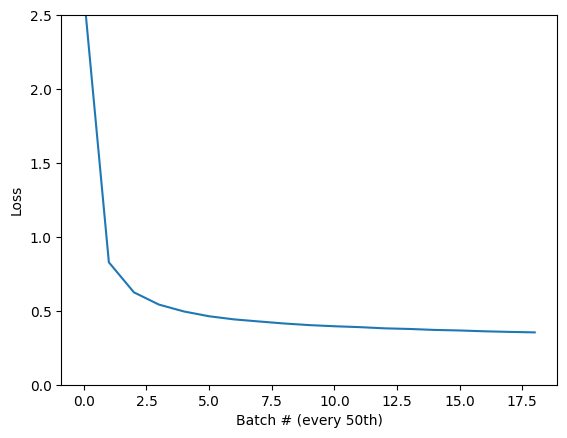

In [53]:
plt.plot(range(len(base_model_results)), base_model_results)
plt.ylim(0, 2.5)
plt.ylabel('Loss')
plt.xlabel('Batch # (every 50th)')

# Exercise: 
1. Experiment with different variations of the gradient descent implementation; try varying the learning rate and the batch size. Assuming that you have a fixed time budget (say 2 minutes for learning), what can we then say about the effect of changing the parameters?
2. Implement momentum in the learning algorithm. How does it affect the results?
3. Try with different initialization schemes for the parameters (e.g. allowing for larger values). How does it affect the behavior of the algorithm?
4. Analyze the behavior of the algorithm on the test set and implement a method for evaluating the accuracy over the entire training/test set.
5. If you feel adventorous, you are welcome to try to specify and experiment with other more advanced model architectures.

### 1. Experiment with different variations of the gradient descent implementation; try varying the learning rate and the batch size. Assuming that you have a fixed time budget (say 2 minutes for learning), what can we then say about the effect of changing the parameters?

* Learning rate: converges faster towards local minimum. As with higher learning rates, training can lead to divergent behavior, where the model fails to converge or even starts to diverge after initially converging. Clear from the plot below that shows multiple fluctuations.

* Batch size: increasing batch size dimishes uncertainty in derived gradients. While each iteration is more informative, it takes more iterations to adequately converge which might not be possible under a fixed time budget.

In [ ]:
def model_trainer(epochs, lr, inc_momentum, train_loader, test_loader, momentum=0.9):
    train_losses = []
    weights = torch.randn(784, 10) / np.sqrt(784)
    weights.requires_grad_()
    bias = torch.zeros(10, requires_grad=True)
    v_weights = torch.zeros_like(weights)
    v_bias = torch.zeros_like(bias)
    
    for epoch in range(epochs):

        for batch_idx, (xb, yb) in enumerate(train_loader):
            # We flatten the digit representation so that it is consistent with the weight matrix
            xb = xb.squeeze().flatten(start_dim=1)
            
            # Predictions
            pred = model(xb, weights, bias)
            
            # We specify the loss
            loss = loss_func(pred, yb)
            
            # Add l2 regularization
            #l2_norm = torch.sum(weights**2)
            #loss += l2_lambda * l2_norm
            #weights *= 1 - lr * l2_lambda
            
            # Perform backpropagation      
            loss.backward()
            
            with torch.no_grad():
                if inc_momentum:
                    # Update velocity and weights
                    v_weights = (momentum * v_weights) - (lr * weights.grad)
                    v_bias = (momentum * v_bias) - (lr * bias.grad)
                    weights += v_weights
                    bias += v_bias
                else:
                    weights -= weights.grad * lr
                    bias -= bias.grad * lr
                
                # After updating we set the gradients to zero so that we ar eready for the next round
                weights.grad.zero_()
                bias.grad.zero_()
                        
                if batch_idx % 50 == 0:
                    with torch.no_grad():
                        train_loss = np.mean([loss_func(model(txb.squeeze().flatten(start_dim=1), weights, bias), tyb).item() for txb, tyb in train_loader])
                        print(f"Epoch: {epoch}, B-idx: {batch_idx}, Training loss: {train_loss}")
                        train_losses.append(train_loss)
                        
    return train_losses

In [51]:
higher_lr_model = model_trainer(
                        epochs=1, 
                        lr=0.3,
                        inc_momentum=False,
                        train_loader=train_loader,
                        test_loader=test_loader
                    )

Epoch: 0, B-idx: 0, Training loss: 6.166435327865422
Epoch: 0, B-idx: 50, Training loss: 0.8539476075025001
Epoch: 0, B-idx: 100, Training loss: 0.6102552871539522
Epoch: 0, B-idx: 150, Training loss: 0.7073394255931063
Epoch: 0, B-idx: 200, Training loss: 0.6440162765128272
Epoch: 0, B-idx: 250, Training loss: 0.6740613688172689
Epoch: 0, B-idx: 300, Training loss: 0.4735567915056751
Epoch: 0, B-idx: 350, Training loss: 0.5649682346787026
Epoch: 0, B-idx: 400, Training loss: 0.49357198685137577
Epoch: 0, B-idx: 450, Training loss: 0.6112128592201514
Epoch: 0, B-idx: 500, Training loss: 0.5348083071077048
Epoch: 0, B-idx: 550, Training loss: 0.5036125217340013
Epoch: 0, B-idx: 600, Training loss: 0.6384223333712834
Epoch: 0, B-idx: 650, Training loss: 0.7911732188547089
Epoch: 0, B-idx: 700, Training loss: 1.3409066529416327
Epoch: 0, B-idx: 750, Training loss: 0.543507597574007
Epoch: 0, B-idx: 800, Training loss: 0.5906414583976716
Epoch: 0, B-idx: 850, Training loss: 0.5340098845663

In [56]:
train_loader_128b, test_loader_128b = dataload(data_batch_size=128)

higher_batch_size_model = model_trainer(
                        epochs=1, 
                        lr=0.01,
                        inc_momentum=False,
                        train_loader=train_loader_128b,
                        test_loader=test_loader_128b
                    )

Epoch: 0, B-idx: 0, Training loss: 2.519285108489014
Epoch: 0, B-idx: 50, Training loss: 0.8240414264359708
Epoch: 0, B-idx: 100, Training loss: 0.6230876302159926
Epoch: 0, B-idx: 150, Training loss: 0.5417026034169106
Epoch: 0, B-idx: 200, Training loss: 0.4959262252362298
Epoch: 0, B-idx: 250, Training loss: 0.4664929453879277
Epoch: 0, B-idx: 300, Training loss: 0.4447292926341994
Epoch: 0, B-idx: 350, Training loss: 0.4289404504588926
Epoch: 0, B-idx: 400, Training loss: 0.4161285557218198
Epoch: 0, B-idx: 450, Training loss: 0.40515041421217196


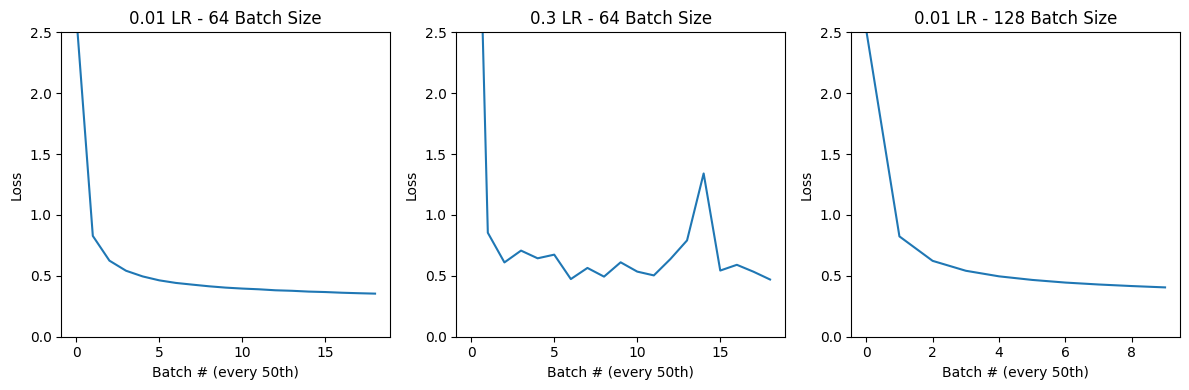

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot for model_1_results
axs[0].plot(range(len(base_model_results)), base_model_results)
axs[0].set_ylim(0, 2.5)
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Batch # (every 50th)')
axs[0].set_title('0.01 LR - 64 Batch Size')

# Plot for higher_lr_model
axs[1].plot(range(len(higher_lr_model)), higher_lr_model)
axs[1].set_ylim(0, 2.5)
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Batch # (every 50th)')
axs[1].set_title('0.3 LR - 64 Batch Size')

# Plot for higher_batch_size_model
axs[2].plot(range(len(higher_batch_size_model)), higher_batch_size_model)
axs[2].set_ylim(0, 2.5)
axs[2].set_ylabel('Loss')
axs[2].set_xlabel('Batch # (every 50th)')
axs[2].set_title('0.01 LR - 128 Batch Size')

plt.tight_layout()
plt.show()

### 2. Implement momentum in the learning algorithm. How does it affect the results?

Faster convergence compared to baseline model with no momentum. 

In [123]:
momentum_model = model_trainer(
                        epochs=1, 
                        lr=0.01,
                        inc_momentum=True,
                        train_loader=train_loader,
                        test_loader=test_loader
                    )

Epoch: 0, B-idx: 0, Training loss: 2.6597213574818204
Epoch: 0, B-idx: 50, Training loss: 0.437203117453658
Epoch: 0, B-idx: 100, Training loss: 0.42968800036447136
Epoch: 0, B-idx: 150, Training loss: 0.3652673529377624
Epoch: 0, B-idx: 200, Training loss: 0.3460232117362241
Epoch: 0, B-idx: 250, Training loss: 0.34116539426608633
Epoch: 0, B-idx: 300, Training loss: 0.3247787926369893
Epoch: 0, B-idx: 350, Training loss: 0.3703536878326046
Epoch: 0, B-idx: 400, Training loss: 0.3201073647133196
Epoch: 0, B-idx: 450, Training loss: 0.3256520086180554
Epoch: 0, B-idx: 500, Training loss: 0.3181519151242303
Epoch: 0, B-idx: 550, Training loss: 0.3225955292900234
Epoch: 0, B-idx: 600, Training loss: 0.30991756140804494
Epoch: 0, B-idx: 650, Training loss: 0.30347796085515
Epoch: 0, B-idx: 700, Training loss: 0.30737274466578896
Epoch: 0, B-idx: 750, Training loss: 0.3124645612975046
Epoch: 0, B-idx: 800, Training loss: 0.3020373299114231
Epoch: 0, B-idx: 850, Training loss: 0.29999931653

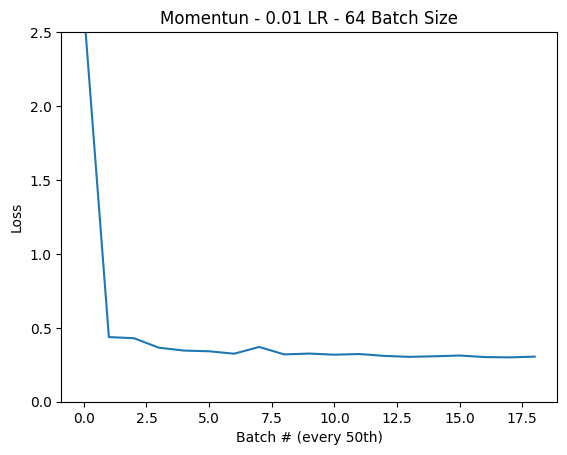

In [124]:
# Plot for higher_batch_size_model
plt.plot(range(len(momentum_model)), momentum_model)
plt.ylim(0, 2.5)
plt.ylabel('Loss')
plt.xlabel('Batch # (every 50th)')
plt.title('Momentun - 0.01 LR - 64 Batch Size')
plt.show()

### 3. Try with different initialization schemes for the parameters (e.g. allowing for larger values). How does it affect the behavior of the algorithm?

Keep getting "Nan" values for train losses.

### 4. Analyze the behavior of the algorithm on the test set and implement a method for evaluating the accuracy over the entire training/test set.

In [138]:
def evaluate_model(weights, bias, data_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.squeeze().flatten(start_dim=1)
            outputs = model(images, weights, bias)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    
    return accuracy
    

In [143]:
def model_trainer(epochs, lr, inc_momentum, train_loader, test_loader, momentum=0.9):
    train_losses = []
    weights = torch.randn(784, 10) / np.sqrt(784)
    weights.requires_grad_()
    bias = torch.zeros(10, requires_grad=True)
    v_weights = torch.zeros_like(weights)
    v_bias = torch.zeros_like(bias)
    
    for epoch in range(epochs):

        for batch_idx, (xb, yb) in enumerate(train_loader):
            # We flatten the digit representation so that it is consistent with the weight matrix
            xb = xb.squeeze().flatten(start_dim=1)
            
            # Predictions
            pred = model(xb, weights, bias)
            
            # We specify the loss
            loss = loss_func(pred, yb)
            
            # Add l2 regularization
            #l2_norm = torch.sum(weights**2)
            #loss += l2_lambda * l2_norm
            #weights *= 1 - lr * l2_lambda
            
            # Perform backpropagation      
            loss.backward()
            
            with torch.no_grad():
                if inc_momentum:
                    # Update velocity and weights
                    v_weights = (momentum * v_weights) - (lr * weights.grad)
                    v_bias = (momentum * v_bias) - (lr * bias.grad)
                    weights += v_weights
                    bias += v_bias
                else:
                    weights -= weights.grad * lr
                    bias -= bias.grad * lr
                
                # After updating we set the gradients to zero so that we ar eready for the next round
                weights.grad.zero_()
                bias.grad.zero_()
                        
                if batch_idx % 50 == 0:
                    with torch.no_grad():
                        train_loss = np.mean([loss_func(model(txb.squeeze().flatten(start_dim=1), weights, bias), tyb).item() for txb, tyb in train_loader])
                        print(f"Epoch: {epoch}, B-idx: {batch_idx}, Training loss: {train_loss}")
                        train_losses.append(train_loss)
    
    # Model evaluation
    train_accuracy = evaluate_model(weights, bias, train_loader)
    test_accuracy = evaluate_model(weights, bias, test_loader)
                        
    return train_losses, train_accuracy, test_accuracy

In [144]:
_, train_acc, test_acc = model_trainer(
                        epochs=1, 
                        lr=0.01,
                        inc_momentum=True,
                        train_loader=train_loader,
                        test_loader=test_loader
                    )

print("Train accuracy: {}\n".format(train_acc), "Test accuracy: {}".format(test_acc))

Epoch: 0, B-idx: 0, Training loss: 2.535852252293243
Epoch: 0, B-idx: 50, Training loss: 0.4275012305264534
Epoch: 0, B-idx: 100, Training loss: 0.3944615719875674
Epoch: 0, B-idx: 150, Training loss: 0.3842074264214237
Epoch: 0, B-idx: 200, Training loss: 0.35765665187351486
Epoch: 0, B-idx: 250, Training loss: 0.34033947567473344
Epoch: 0, B-idx: 300, Training loss: 0.3321808479202073
Epoch: 0, B-idx: 350, Training loss: 0.32860002188540216
Epoch: 0, B-idx: 400, Training loss: 0.33143126217128116
Epoch: 0, B-idx: 450, Training loss: 0.3142879173588524
Epoch: 0, B-idx: 500, Training loss: 0.32175831688937345
Epoch: 0, B-idx: 550, Training loss: 0.31451802299633974
Epoch: 0, B-idx: 600, Training loss: 0.31153762348488706
Epoch: 0, B-idx: 650, Training loss: 0.307600862459778
Epoch: 0, B-idx: 700, Training loss: 0.3002422606385847
Epoch: 0, B-idx: 750, Training loss: 0.3002451470634068
Epoch: 0, B-idx: 800, Training loss: 0.3084440001927968
Epoch: 0, B-idx: 850, Training loss: 0.3051768